In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler, scale
import seaborn as sns



In [72]:
##Artists dataset exploration

In [73]:
artists_df = pd.read_csv(r"C:\Users\AMMINISTRATORE\Desktop\Guido\Unipi\DM2\dataset\dataset\tabular\artists.csv", skipinitialspace=True)

In [74]:
artists_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30141 entries, 0 to 30140
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30140 non-null  object 
 1   name        30139 non-null  object 
 2   popularity  30140 non-null  float64
 3   followers   30140 non-null  float64
 4   genres      30140 non-null  object 
dtypes: float64(2), object(3)
memory usage: 1.1+ MB


In [75]:
artists_df.isnull().sum()

id            1
name          2
popularity    1
followers     1
genres        1
dtype: int64

In [76]:
#Checking for null values in each row
rows_with_null = artists_df[artists_df.isnull().any(axis=1)]

print("Rows with null values:")
print(rows_with_null)

Rows with null values:
                           id name  popularity  followers genres
11872                     NaN  NaN         NaN        NaN    NaN
21223  4oPYazJJ1o4rWBrTw9lm40  NaN        47.0    35655.0     []


In [77]:
# Remove the row at the specified index
artists_df = artists_df.drop(11872)
artists_df = artists_df.drop(21223)

#Checking for null values in each row
rows_with_null = artists_df[artists_df.isnull().any(axis=1)]

print("Rows with null values:")
print(rows_with_null)

Rows with null values:
Empty DataFrame
Columns: [id, name, popularity, followers, genres]
Index: []


In [78]:
empty_list_in_genres = artists_df['genres'].apply(lambda x: x == '[]')
print("Empty list in genres column:", any(empty_list_in_genres))

Empty list in genres column: True


In [79]:
# Remove the row at the specified index
artists_df = artists_df.drop(12798)
artists_df = artists_df.drop(15776)
artists_df = artists_df.drop_duplicates(subset=['name'])

# check duplicate 
duplicati = artists_df.duplicated(subset=['name'], keep=False)

# Visualizza i duplicati
print("Duplicati nella colonna 'colonna_da_controllare':")
print(artists_df[duplicati])

Duplicati nella colonna 'colonna_da_controllare':
Empty DataFrame
Columns: [id, name, popularity, followers, genres]
Index: []


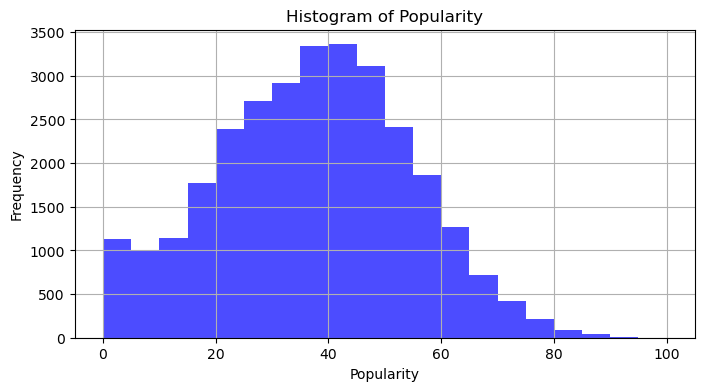

In [60]:

# Plot histogram for 'popularity'
plt.figure(figsize=(8, 4))
plt.hist(artists_df['popularity'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of Popularity')
plt.grid(True)
plt.show()


In [80]:
def find_outliers_iqr(data):
    Q1 = data.quantile(0.15)
    Q3 = data.quantile(0.85)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

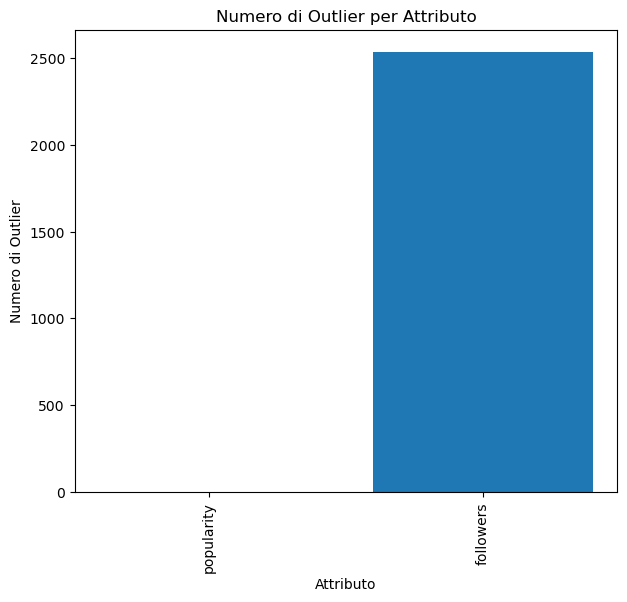

{'popularity': 0, 'followers': 2537}


In [81]:
selected_columns = ['popularity', 'followers']

# Create a DataFrame with selected columns
selected_df = artists_df[selected_columns]

# Calcola il numero di outlier per ogni attributo numerico
outlier_counts = {}
attributes = selected_df.columns
for attribute in attributes:
    outliers = find_outliers_iqr(selected_df[attribute])
    outlier_counts[attribute] = outliers.count()

# Creare un grafico a barre per il numero di outlier per ogni attributo numerico
plt.figure(figsize=(7, 6))
plt.bar(outlier_counts.keys(), outlier_counts.values())
plt.title('Numero di Outlier per Attributo')
plt.xlabel('Attributo')
plt.ylabel('Numero di Outlier')
plt.xticks(rotation=90)

# Show the plot
plt.show()

print(outlier_counts)

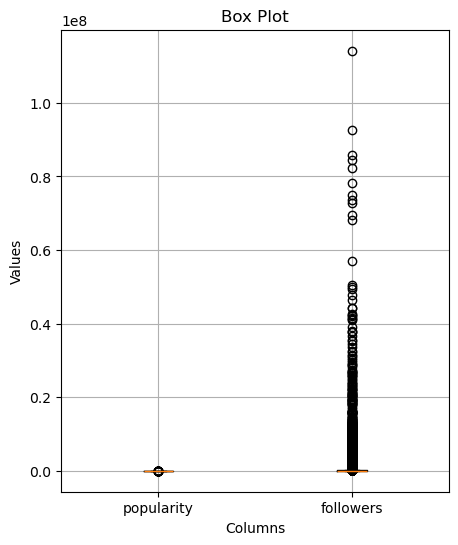

In [63]:
# Creating box plot using matplotlib
plt.figure(figsize=(5, 6))
plt.boxplot(selected_df.values, labels=selected_df.columns)
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Box Plot')
plt.grid(True)
plt.show()

In [64]:
# Extract the indexes
indexes = outliers.index
# Convert indexes to a list if needed
indexes_list = indexes.tolist()
for i in indexes_list:
   artists_df = artists_df.drop(i)

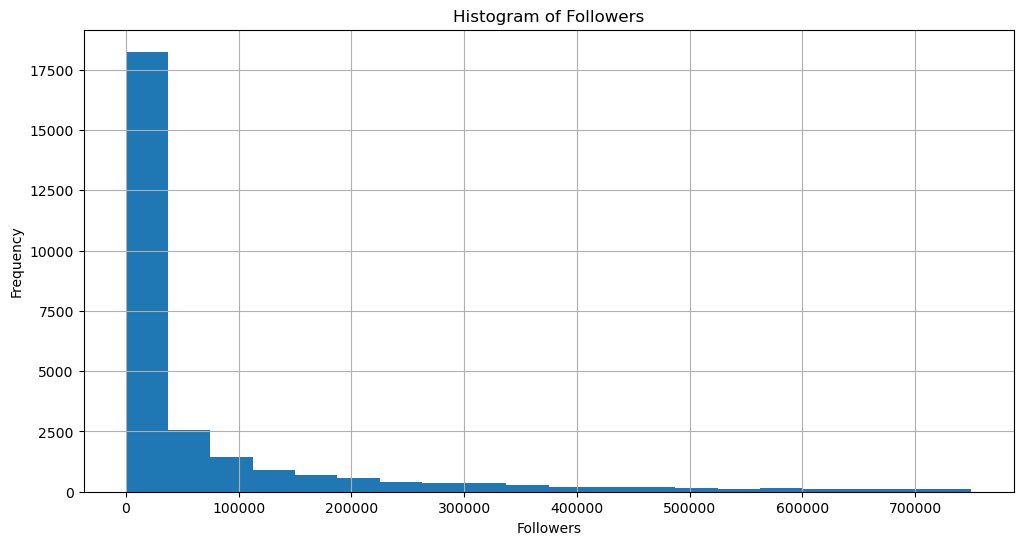

In [65]:
plt.figure(figsize=(12, 6))
plt.hist(artists_df['followers'], bins=20, range=(0, 750000))  # Specifies the bin range from 0 to 100
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Histogram of Followers')
plt.grid(True)
plt.show()

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Assuming 'column1' and 'column2' are the columns you want to scale
columns_to_scale = ['popularity', 'followers']

# Fit and transform the selected columns
scaled_values = scale(artists_df[columns_to_scale])

# Update the DataFrame with scaled values
artists_df[columns_to_scale] = scaled_values


C:\Users\AMMINISTRATORE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\AMMINISTRATORE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\AMMINISTRATORE\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


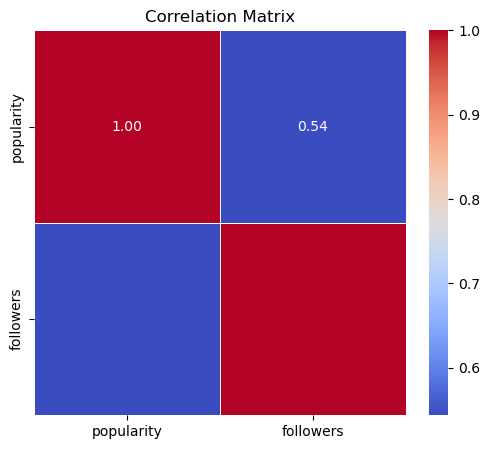

In [70]:
selected_columns = ['popularity', 'followers']

# Create a DataFrame with selected columns
selected_df = artists_df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#Creation of the merged_df and exploration

In [3]:
tracks_df = pd.read_csv(r"C:\Users\AMMINISTRATORE\Desktop\Guido\Unipi\DM2\dataset\dataset\tabular\tracks.csv", skipinitialspace=True)

In [6]:
tracks_df.head()


,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno


In [20]:
# Assuming df is your DataFrame
tracks_df = tracks_df.drop_duplicates(subset=['id'])

# check duplicate in column id
duplicati = tracks_df.duplicated(subset=['id', 'name', 'popularity'], keep=False)

print("Duplicati nella colonna 'id':")
print(tracks_df[duplicati])

Duplicati nella colonna 'id':
Empty DataFrame
Columns: [id, name, disc_number, duration_ms, explicit, popularity, track_number, artists, album_type, album_name, album_release_date, album_release_date_precision, album_total_tracks, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, features_duration_ms, time_signature, start_of_fade_out, tempo_confidence, time_signature_confidence, key_confidence, mode_confidence, n_beats, n_bars, genre]
Index: []

[0 rows x 34 columns]


In [21]:
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89562 entries, 0 to 109546
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            89562 non-null  object 
 1   name                          89562 non-null  object 
 2   disc_number                   89562 non-null  int64  
 3   duration_ms                   89562 non-null  int64  
 4   explicit                      89562 non-null  bool   
 5   popularity                    89562 non-null  int64  
 6   track_number                  89562 non-null  int64  
 7   artists                       89562 non-null  object 
 8   album_type                    89562 non-null  object 
 9   album_name                    89562 non-null  object 
 10  album_release_date            89562 non-null  object 
 11  album_release_date_precision  89562 non-null  object 
 12  album_total_tracks            89562 non-null  int64  
 13  dance

In [22]:
# Extract unique artist names from artists_df and tracks_df
artists_in_artists_df = set(artists_df['name'])
artists_in_tracks_df = set(tracks_df['artists'])

# Find common artists between the two DataFrames
common_artists = artists_in_artists_df.intersection(artists_in_tracks_df)

# Count the number of common artists
num_common_artists = len(common_artists)

print("Number of artists in artists_df also present in tracks_df:", num_common_artists)

Number of artists in artists_df also present in tracks_df: 15002


In [16]:
#obtain a merged df with nan values for the tracks that don't have their artist in the artists_df
merged_NaN_df = pd.merge(tracks_df, artists_df, left_on='artists', right_on='name', how='left')

In [17]:
merged_NaN_df.head()
merged_NaN_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110401 entries, 0 to 110400
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   id_x                          110401 non-null  object 
 1   name_x                        110401 non-null  object 
 2   disc_number                   110401 non-null  int64  
 3   duration_ms                   110401 non-null  int64  
 4   explicit                      110401 non-null  bool   
 5   popularity_x                  110401 non-null  int64  
 6   track_number                  110401 non-null  int64  
 7   artists                       110401 non-null  object 
 8   album_type                    110401 non-null  object 
 9   album_name                    110401 non-null  object 
 10  album_release_date            110401 non-null  object 
 11  album_release_date_precision  110401 non-null  object 
 12  album_total_tracks            110401 non-nul

In [18]:
merged_NaN_df.isnull().sum()

id_x                                0
name_x                              0
disc_number                         0
duration_ms                         0
explicit                            0
popularity_x                        0
track_number                        0
artists                             0
album_type                          0
album_name                          0
album_release_date                  0
album_release_date_precision        0
album_total_tracks                  0
danceability                        0
energy                              0
key                                 0
loudness                            0
mode                                0
speechiness                         0
acousticness                        0
instrumentalness                    0
liveness                            0
valence                             0
tempo                               0
features_duration_ms                0
time_signature                      0
start_of_fad

In [23]:
#obtain a merged_df witout the tracks which artist is not in the artists_df
merged_df = pd.merge(tracks_df, artists_df, left_on='artists', right_on='name')
merged_df.isnull().sum()
#merged_df.info()

id_x                            0
name_x                          0
disc_number                     0
duration_ms                     0
explicit                        0
popularity_x                    0
track_number                    0
artists                         0
album_type                      0
album_name                      0
album_release_date              0
album_release_date_precision    0
album_total_tracks              0
danceability                    0
energy                          0
key                             0
loudness                        0
mode                            0
speechiness                     0
acousticness                    0
instrumentalness                0
liveness                        0
valence                         0
tempo                           0
features_duration_ms            0
time_signature                  0
start_of_fade_out               0
tempo_confidence                0
time_signature_confidence       0
key_confidence

In [26]:
# Assuming df is your DataFrame
#merged_df = merged_df.drop_duplicates(subset=['id'])

# check duplicate in column id
duplicati = merged_df.duplicated(subset=['id_y'], keep=False)

print("Duplicati nella colonna 'name_y':")
print(merged_df[duplicati])

Duplicati nella colonna 'name_y':
                         id_x          name_x  disc_number  duration_ms  \
0      4rjA5kJJWbwU1prXCvg6Fk            Grey            1       290479   
1      1tNxprI7wf87blRuXUyEvC            Grey            1       293578   
2      3Uto0giI75nJh6wFejmyPm       Eiswinter            1       309677   
3      3s7cHradiNwTW2OZ9JrZXG    Grey - Mixed            1       170329   
4      5plDcIUqvmCsbc1rvJRfk1         Loreley            1       345000   
...                       ...             ...          ...          ...   
66868  2p4Y8c7O0Tm48Zk6IAWcTo     Second Life            1       376615   
66869  73RKddd2yIFya9TZRFCd6r    I Don't Care            1       235259   
66870  5ruT2dWSHtML4esT7doTzt  Cry Me a River            1       278851   
66886  1Gq66jNOLmAyUVqFfsAEmH         Falling            1       300000   
66887  1b7E37BQouTJc7nf1HbIar   Tunnel Vision            1       265030   

       explicit  popularity_x  track_number  artists album_type  

In [28]:
unique_values = merged_df[~duplicati]['id_y'].nunique()

print("\nUnique values in column 'name_y' after removing duplicates:")
print(unique_values)


Unique values in column 'name_y' after removing duplicates:
6447


In [29]:
#filling the empty genres of the artists
def update_genres(df):
    for index, row in df.iterrows():
        if row['genres']=='[]':  # Check if artist_genres list is empty
            artist_name = row['name_y']
            # Find all songs of the artist
            artist_songs = df[df['name_y'] == artist_name]
            # Get unique genres of the artist's songs
            artist_genres = set(genre for genres in artist_songs['genre'] for genre in genres)
            # Update the genres list for the artist
            df.at[index, 'genres'] = list(artist_genres)
    return df
# Call the function to update genres, obtain a merged_df but with no empty lists for artist's genres
updated_merged_df = update_genres(merged_df.copy())

In [30]:
empty_list_in_genres = updated_merged_df['genres'].apply(lambda x: x == '[]')
print("Empty list in genres column:", any(empty_list_in_genres))

Empty list in genres column: False


In [34]:
# Merge the two DataFrames based on the artist's name
#Correlation between artist popularity and his songs mean popularity
mean_popularity_per_artist = updated_merged_df.groupby('name_y')['popularity_x'].mean()
mean_popularity_per_artist_df = mean_popularity_per_artist.reset_index()

mean_popularity_per_artist_df = pd.merge(mean_popularity_per_artist_df, artists_df, left_on='name_y', right_on='name', how='left')

# Display the updated DataFrame
print(mean_popularity_per_artist_df)

                                  name_y  popularity_x  \
0                                 !nvite     19.000000   
1                  "Puppy Dog Pals" Cast     49.000000   
2                    "Weird Al" Yankovic     27.200000   
3                                 $affie     41.000000   
4      'Falsettos' 2016 Broadway Company     31.000000   
...                                  ...           ...   
14997                                黃仲崑     22.333333   
14998                                 黃妃     27.500000   
14999                                黃小琥     59.000000   
15000                                黃敏華     16.000000   
15001                            龍藏Ryuzo      5.000000   

                           id                               name  popularity  \
0      6KJtK1U4TEYXQgg65JYAJI                             !nvite        27.0   
1      6XYqhT02pSA6p3BoYe9P63              "Puppy Dog Pals" Cast        42.0   
2      1bDWGdIC2hardyt55nlQgG                "Weird Al" Yankovi

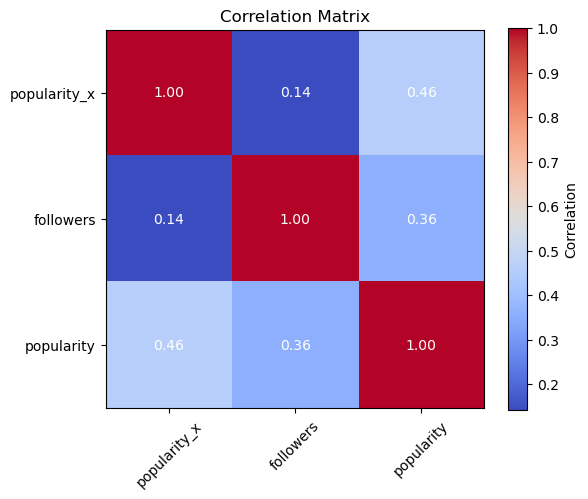

In [42]:
correlation_matrix = selected_df.corr()

# Plot the heatmap using Matplotlib
plt.figure(figsize=(6, 5))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

# Annotate the heatmap with correlation values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j, i, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center', color='white')

plt.colorbar(label='Correlation')
plt.title('Correlation Matrix')
plt.xticks(np.arange(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(np.arange(len(correlation_matrix)), correlation_matrix.index)
plt.tight_layout()
plt.show()